In [1]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("📊 EDA Environment Ready!")

📊 EDA Environment Ready!


In [2]:
# Cell 2: Load Clean Data
df = pd.read_csv('../data/clean_sales.csv')
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

print("✅ Clean data loaded!")
print(f"📏 Shape: {df.shape}")
print(f"📅 Date range: {df['invoicedate'].min()} to {df['invoicedate'].max()}")
print(f"👥 Unique customers: {df['customerid'].nunique()}")
print(f"🛍️ Total revenue: ${df['total_amount'].sum():,.2f}")

✅ Clean data loaded!
📏 Shape: (392692, 13)
📅 Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
👥 Unique customers: 4338
🛍️ Total revenue: $8,887,208.89


In [3]:
# Cell 3: Key Performance Indicators
print("🎯 KEY PERFORMANCE INDICATORS")
print("=" * 50)

# Basic KPIs
total_revenue = df['total_amount'].sum()
total_orders = df['invoiceno'].nunique()
total_customers = df['customerid'].nunique()
total_products = df['stockcode'].nunique()
avg_order_value = df.groupby('invoiceno')['total_amount'].sum().mean()
avg_customer_value = df.groupby('customerid')['total_amount'].sum().mean()

kpi_summary = {
    'Total Revenue': f"${total_revenue:,.2f}",
    'Total Orders': f"{total_orders:,}",
    'Unique Customers': f"{total_customers:,}",
    'Unique Products': f"{total_products:,}",
    'Average Order Value': f"${avg_order_value:.2f}",
    'Average Customer Value': f"${avg_customer_value:.2f}",
    'Revenue per Customer': f"${total_revenue/total_customers:.2f}"
}

for key, value in kpi_summary.items():
    print(f"{key:<25}: {value}")

🎯 KEY PERFORMANCE INDICATORS
Total Revenue            : $8,887,208.89
Total Orders             : 18,532
Unique Customers         : 4,338
Unique Products          : 3,665
Average Order Value      : $479.56
Average Customer Value   : $2048.69
Revenue per Customer     : $2048.69


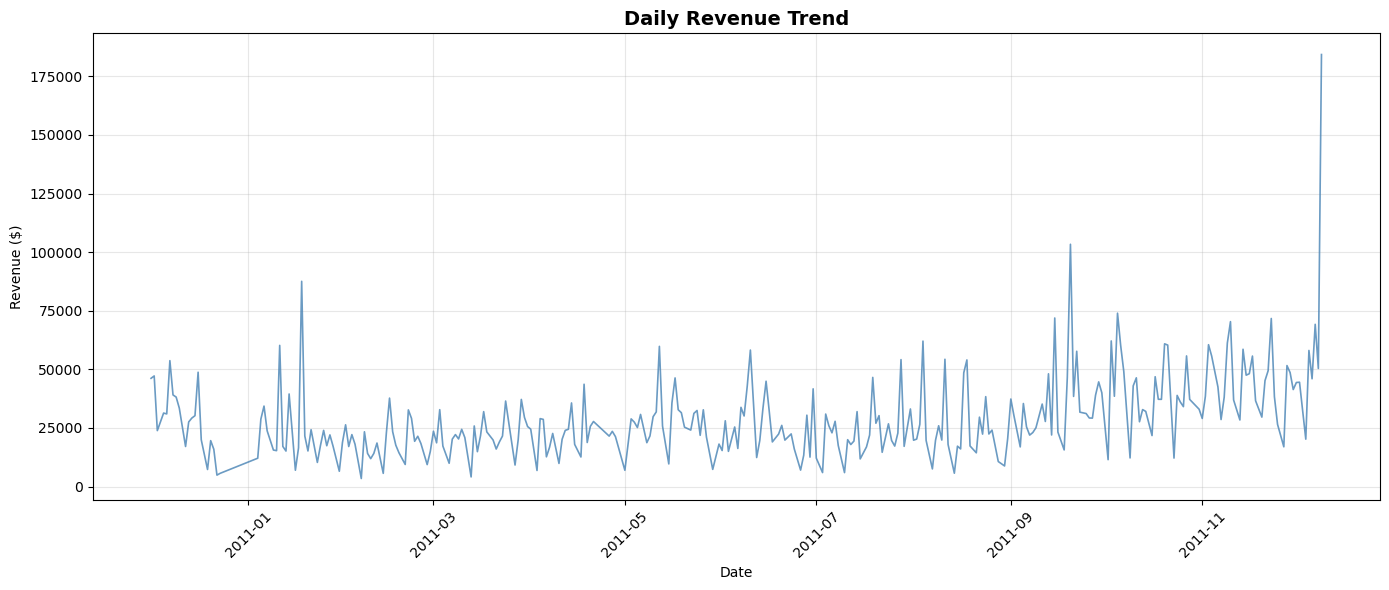

In [6]:
# Cell 4: Daily Revenue Trend Analysis
daily_revenue = df.groupby(df['invoicedate'].dt.date)['total_amount'].sum().reset_index()
daily_revenue.columns = ['date', 'revenue']
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

plt.figure(figsize=(14, 6))
plt.plot(daily_revenue['date'], daily_revenue['revenue'], linewidth=1.2, color='steelblue', alpha=0.8)
plt.title('Daily Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/daily_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

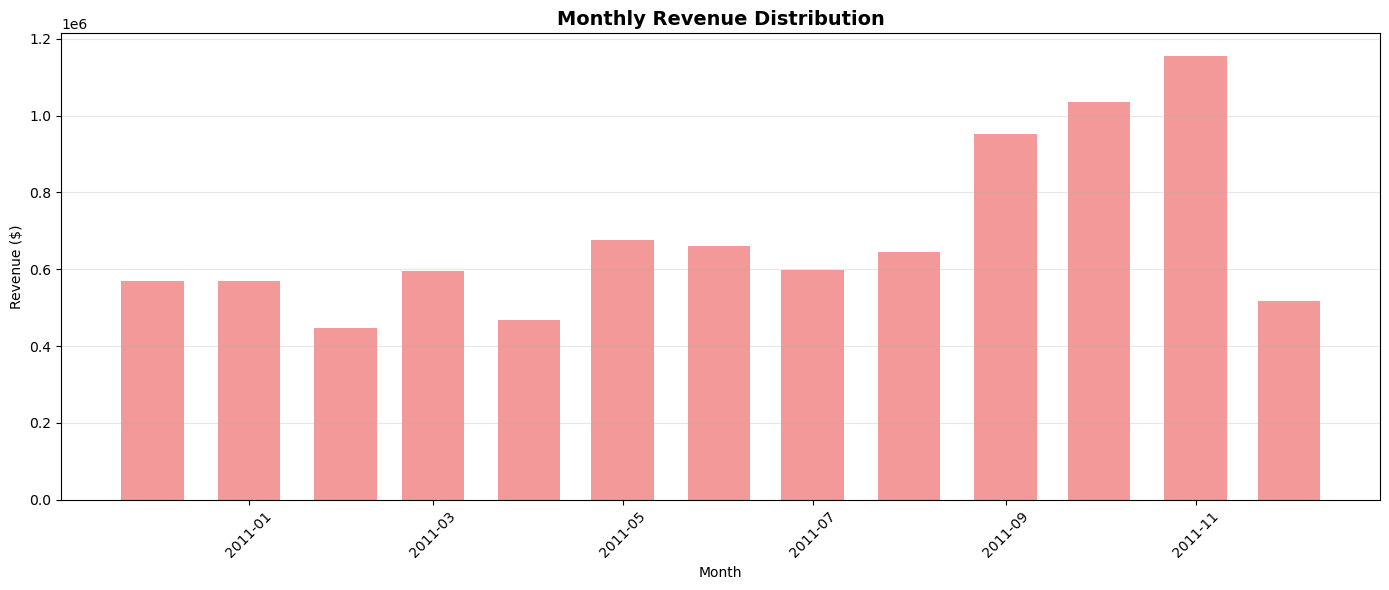

In [7]:
# Cell 5: Monthly Revenue Analysis
df_temp = df.copy()
df_temp['year_month'] = df_temp['invoicedate'].dt.to_period('M')
monthly_revenue = df_temp.groupby('year_month')['total_amount'].sum().reset_index()
monthly_revenue['date'] = monthly_revenue['year_month'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
plt.bar(monthly_revenue['date'], monthly_revenue['total_amount'], color='lightcoral', width=20, alpha=0.8)
plt.title('Monthly Revenue Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/monthly_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

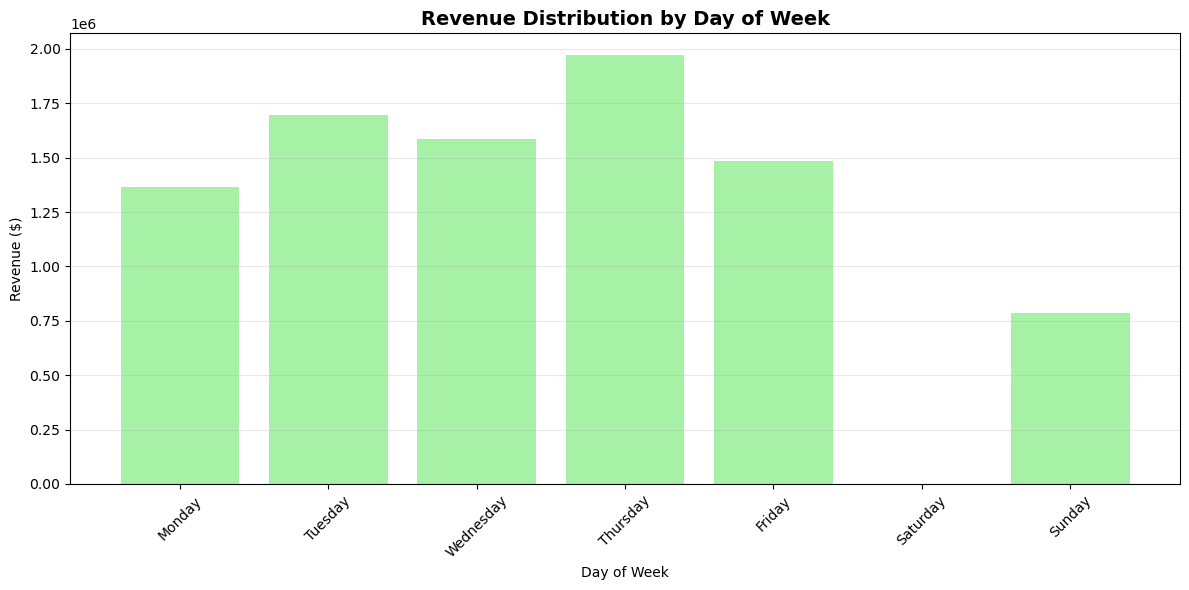

In [8]:
# Cell 6: Revenue by Day of Week
dow_revenue = df.groupby(df['invoicedate'].dt.day_name())['total_amount'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue = dow_revenue.reindex(day_order, fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(dow_revenue.index, dow_revenue.values, color='lightgreen', alpha=0.8)
plt.title('Revenue Distribution by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/dow_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

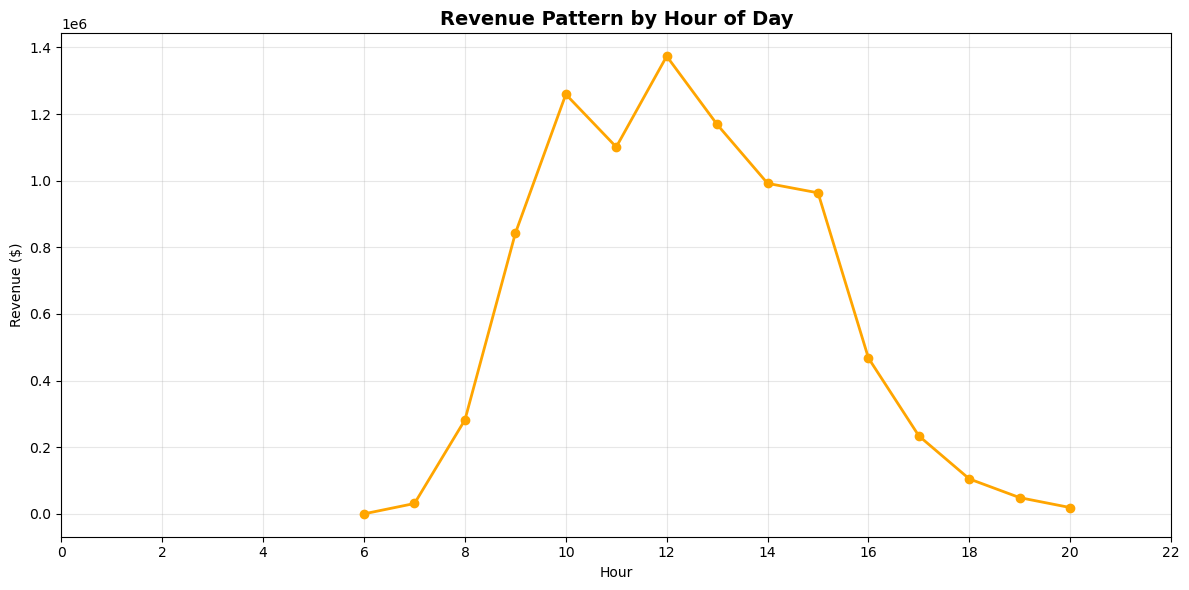

In [9]:
# Cell 7: Hourly Revenue Pattern
if df['invoicedate'].dt.hour.nunique() > 1:
    hourly_revenue = df.groupby(df['invoicedate'].dt.hour)['total_amount'].sum()
    
    plt.figure(figsize=(12, 6))
    plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o', linewidth=2, markersize=6, color='orange')
    plt.title('Revenue Pattern by Hour of Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour')
    plt.ylabel('Revenue ($)')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    plt.tight_layout()
    plt.savefig('../visuals/hourly_revenue.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Hourly analysis not available - insufficient time granularity in dataset")

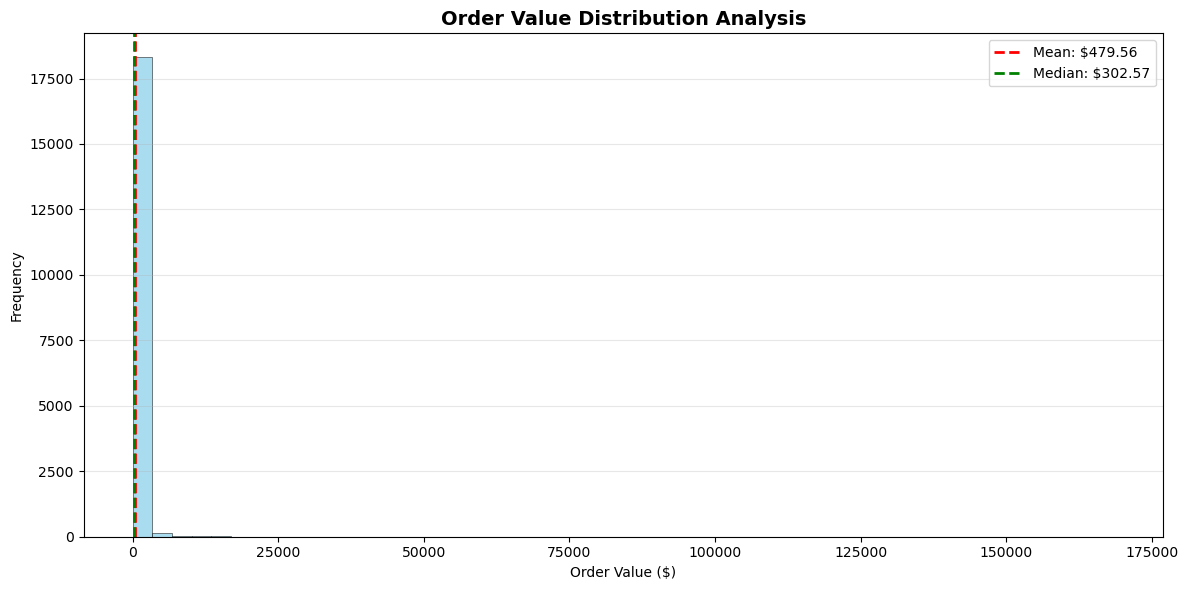

In [10]:
# Cell 8: Customer Purchase Behavior - Order Value Distribution
order_values = df.groupby('invoiceno')['total_amount'].sum()

plt.figure(figsize=(12, 6))
plt.hist(order_values, bins=50, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.axvline(order_values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${order_values.mean():.2f}')
plt.axvline(order_values.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${order_values.median():.2f}')
plt.title('Order Value Distribution Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/order_value_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

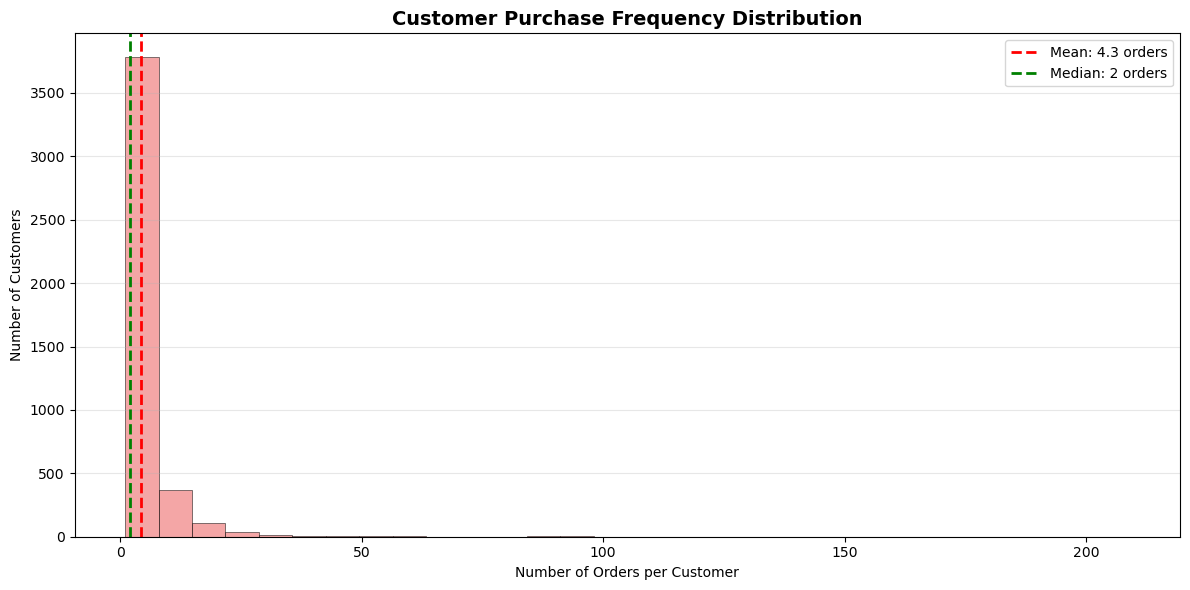

In [11]:
# Cell 9: Customer Purchase Frequency Analysis
customer_orders = df.groupby('customerid')['invoiceno'].nunique()

plt.figure(figsize=(12, 6))
plt.hist(customer_orders, bins=30, color='lightcoral', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.axvline(customer_orders.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {customer_orders.mean():.1f} orders')
plt.axvline(customer_orders.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {customer_orders.median():.0f} orders')
plt.title('Customer Purchase Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/purchase_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

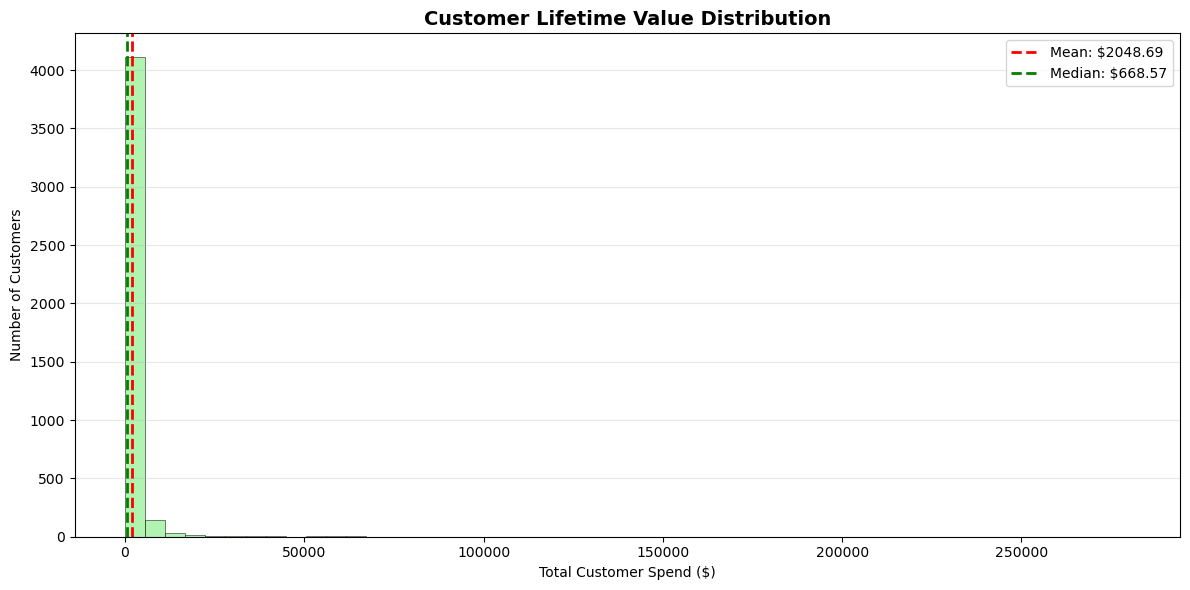

In [12]:
# Cell 10: Customer Lifetime Value Distribution
customer_spend = df.groupby('customerid')['total_amount'].sum()

plt.figure(figsize=(12, 6))
plt.hist(customer_spend, bins=50, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.axvline(customer_spend.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${customer_spend.mean():.2f}')
plt.axvline(customer_spend.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${customer_spend.median():.2f}')
plt.title('Customer Lifetime Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Total Customer Spend ($)')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/clv_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

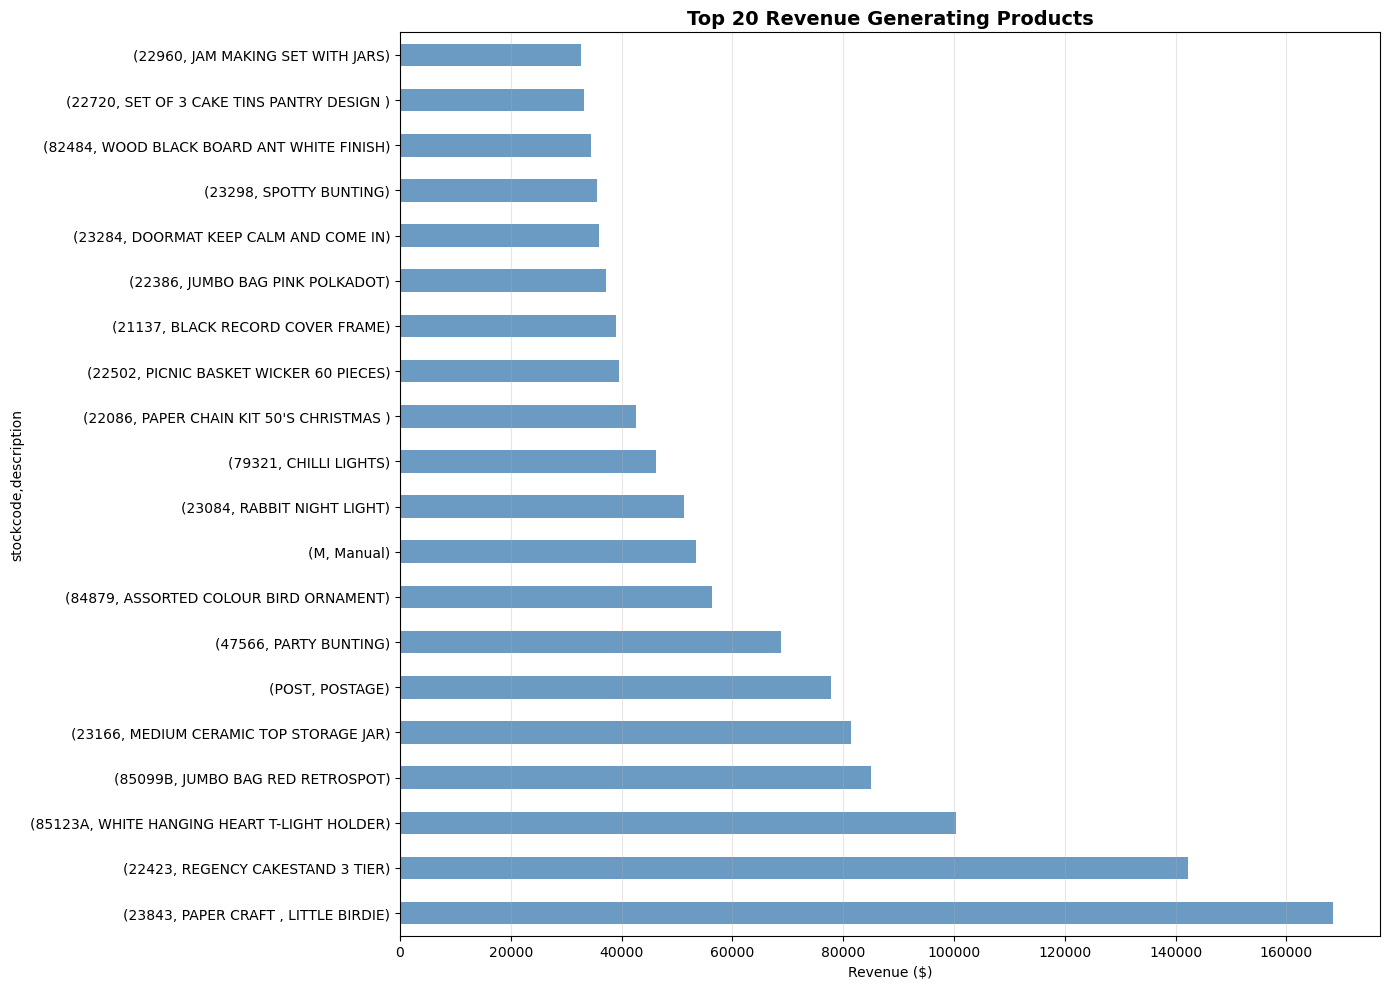

In [13]:
# Cell 11: Top Revenue Generating Products
product_revenue = df.groupby(['stockcode', 'description'])['total_amount'].sum().nlargest(20)

plt.figure(figsize=(14, 10))
product_revenue.plot(kind='barh', color='steelblue', alpha=0.8)
plt.title('Top 20 Revenue Generating Products', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../visuals/top_products_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

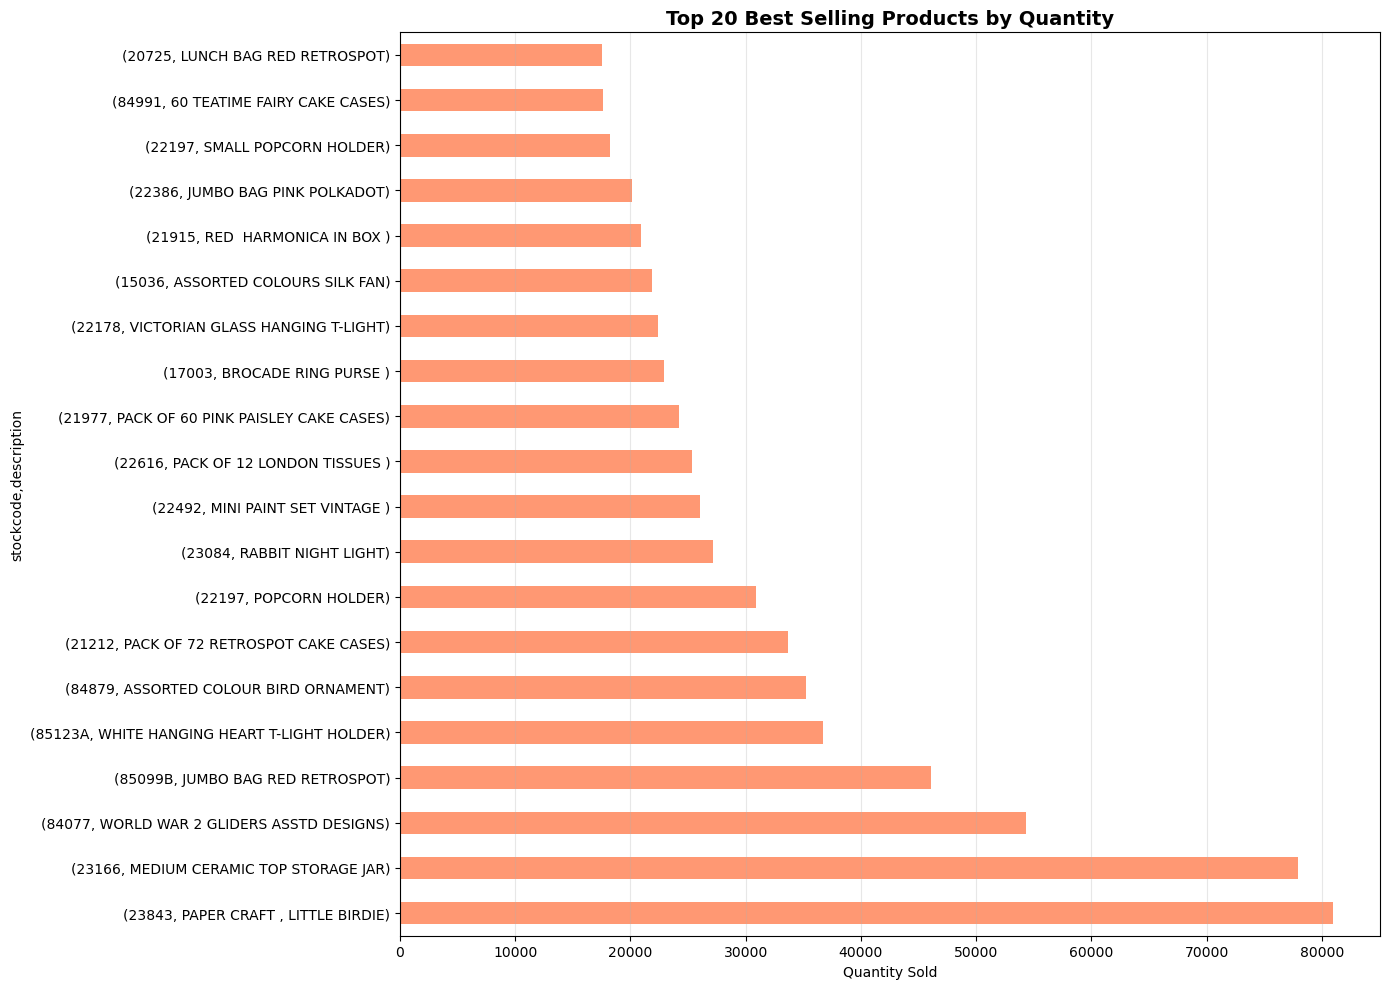

In [14]:
# Cell 12: Top Selling Products by Quantity
product_quantity = df.groupby(['stockcode', 'description'])['quantity'].sum().nlargest(20)

plt.figure(figsize=(14, 10))
product_quantity.plot(kind='barh', color='coral', alpha=0.8)
plt.title('Top 20 Best Selling Products by Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../visuals/top_products_quantity.png', dpi=300, bbox_inches='tight')
plt.show()

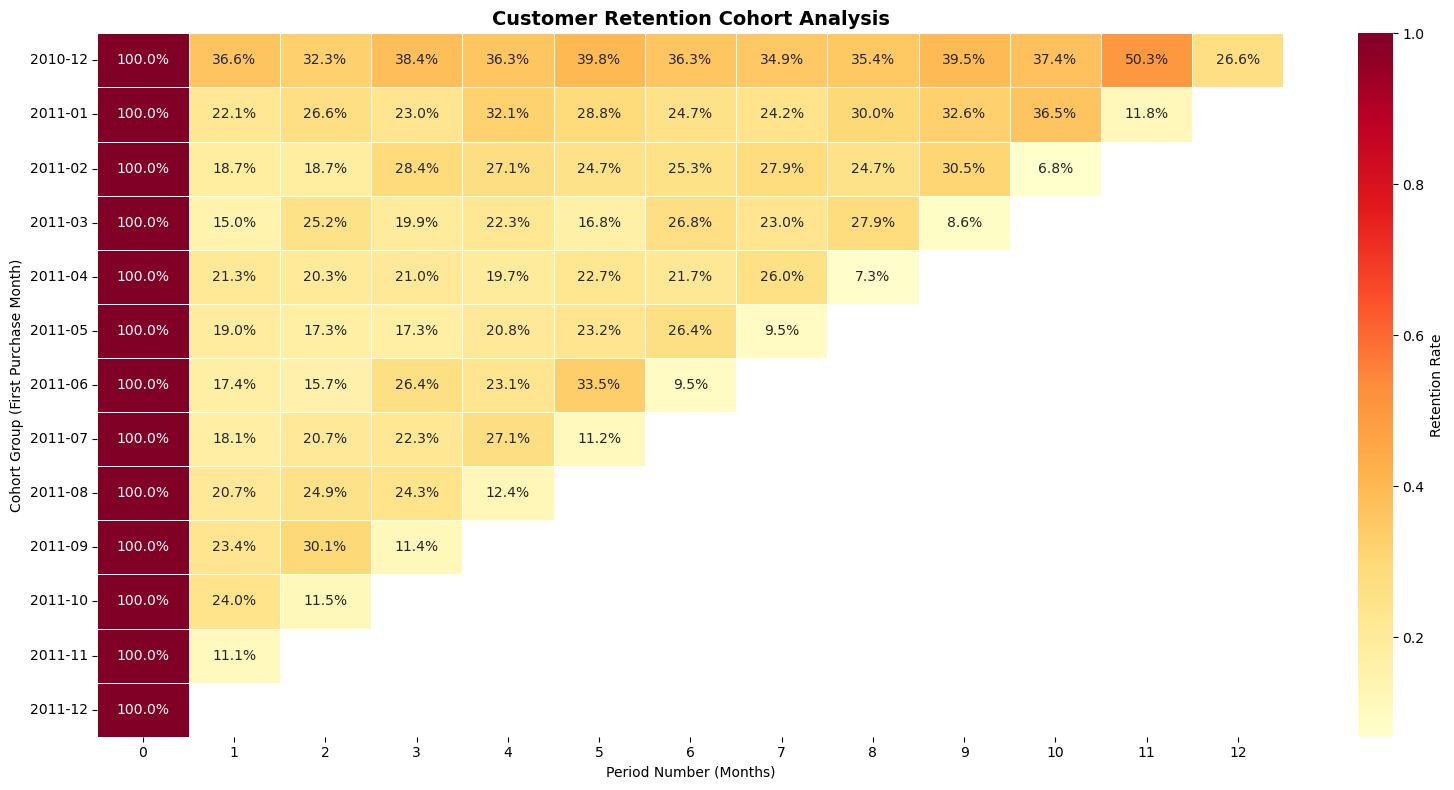

In [15]:
# Cell 13: Customer Retention Cohort Analysis
from operator import attrgetter

def build_cohort_analysis(df):
    df_cohort = df.copy()
    df_cohort['order_period'] = df_cohort['invoicedate'].dt.to_period('M')
    df_cohort['cohort_group'] = df_cohort.groupby('customerid')['invoicedate'].transform('min').dt.to_period('M')
    df_cohort['period_number'] = (df_cohort['order_period'] - df_cohort['cohort_group']).apply(attrgetter('n'))
    
    cohort_data = df_cohort.groupby(['cohort_group', 'period_number'])['customerid'].nunique().reset_index()
    cohort_table = cohort_data.pivot(index='cohort_group', columns='period_number', values='customerid')
    cohort_sizes = df_cohort.groupby('cohort_group')['customerid'].nunique()
    cohort_table_pct = cohort_table.divide(cohort_sizes, axis=0)
    
    return cohort_table, cohort_table_pct

cohort_table, cohort_table_pct = build_cohort_analysis(df)

plt.figure(figsize=(16, 8))
sns.heatmap(cohort_table_pct, annot=True, fmt='.1%', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Retention Rate'})
plt.title('Customer Retention Cohort Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Period Number (Months)')
plt.ylabel('Cohort Group (First Purchase Month)')
plt.tight_layout()
plt.savefig('../visuals/cohort_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

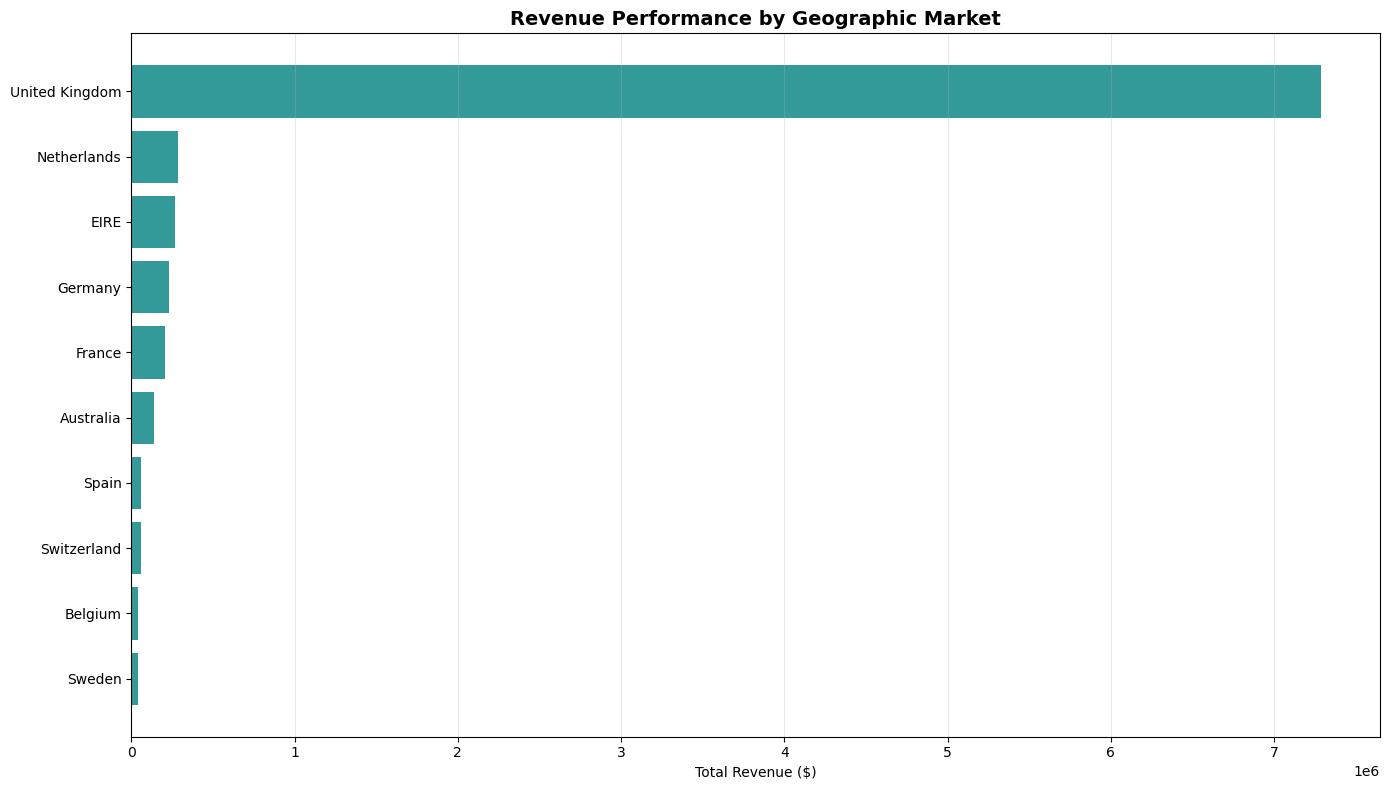

In [16]:
# Cell 14: Geographic Revenue Analysis
country_metrics = df.groupby('country').agg({
    'total_amount': ['sum', 'mean'],
    'customerid': 'nunique',
    'invoiceno': 'nunique'
}).round(2)

country_metrics.columns = ['Total_Revenue', 'Avg_Order_Value', 'Unique_Customers', 'Total_Orders']
country_metrics = country_metrics.sort_values('Total_Revenue', ascending=False)

plt.figure(figsize=(14, 8))
top_countries = country_metrics.head(10)
plt.barh(range(len(top_countries)), top_countries['Total_Revenue'], color='teal', alpha=0.8)
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Total Revenue ($)')
plt.title('Revenue Performance by Geographic Market', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../visuals/geographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Cell 15: Generate Executive KPI Summary
total_revenue = df['total_amount'].sum()
total_orders = df['invoiceno'].nunique()
total_customers = df['customerid'].nunique()
total_products = df['stockcode'].nunique()
avg_order_value = df.groupby('invoiceno')['total_amount'].sum().mean()
avg_customer_value = df.groupby('customerid')['total_amount'].sum().mean()

kpi_summary = {
    'metric': [
        'Total Revenue',
        'Total Orders', 
        'Unique Customers',
        'Unique Products',
        'Average Order Value',
        'Average Customer Lifetime Value',
        'Customer Retention (Month 1)',
        'Revenue Concentration (Top Country)',
        'Peak Revenue Month',
        'Top SKU by Volume'
    ],
    'value': [
        f"${total_revenue:,.2f}",
        f"{total_orders:,}",
        f"{total_customers:,}",
        f"{total_products:,}",
        f"${avg_order_value:.2f}",
        f"${avg_customer_value:.2f}",
        f"{cohort_table_pct[1].mean():.1%}" if 1 in cohort_table_pct.columns else "N/A",
        f"{country_metrics.index[0]} ({country_metrics.iloc[0]['Total_Revenue']/total_revenue:.1%})",
        monthly_revenue.loc[monthly_revenue['total_amount'].idxmax(), 'date'].strftime('%Y-%m'),
        df['stockcode'].value_counts().index[0]
    ]
}

kpi_df = pd.DataFrame(kpi_summary)
kpi_df.to_csv('../data/kpi_summary.csv', index=False)

print("=" * 60)
print("EXECUTIVE DASHBOARD - KEY PERFORMANCE INDICATORS")
print("=" * 60)
for _, row in kpi_df.iterrows():
    print(f"{row['metric']:<35}: {row['value']}")
print("=" * 60)
print("✅ KPI summary exported to ../data/kpi_summary.csv")
print("✅ All visualizations saved to ../visuals/ directory")

EXECUTIVE DASHBOARD - KEY PERFORMANCE INDICATORS
Total Revenue                      : $8,887,208.89
Total Orders                       : 18,532
Unique Customers                   : 4,338
Unique Products                    : 3,665
Average Order Value                : $479.56
Average Customer Lifetime Value    : $2048.69
Customer Retention (Month 1)       : 20.6%
Revenue Concentration (Top Country): United Kingdom (82.0%)
Peak Revenue Month                 : 2011-11
Top SKU by Volume                  : 85123A
✅ KPI summary exported to ../data/kpi_summary.csv
✅ All visualizations saved to ../visuals/ directory
